In [ ]:
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 29.4 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install modin[all]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 88.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os

In [ ]:
os.listdir()

['.config', 'gdrive', 'sample_data']

In [ ]:
import ray
ray.shutdown()
ray.init(_memory=16000 * 1024 * 1024, object_store_memory=500 * 1024 * 1024,_driver_object_store_memory=500 * 1024 * 1024)

2023-05-20 12:11:38,950	INFO worker.py:1616 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 
2023-05-20 12:11:41,030	WARNING worker.py:2227 -- `driver_object_store_memory` is deprecated and will be removed in the future.


Python version:,3.10.11
Ray version:,2.4.0
Dashboard:,http://127.0.0.1:8265


In [ ]:
import modin.pandas as pd

In [ ]:
df = pd.read_csv(
    "/content/gdrive/MyDrive/NOTEEVENTS.csv.gz",
    compression = 'gzip',
    error_bad_lines = False
)

In [ ]:
df.head(25)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...
5,179,53181,170490.0,2172-03-08,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2172-3-5**] D...
6,180,20646,134727.0,2112-12-10,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2112-12-8**] ...
7,181,42130,114236.0,2150-03-01,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2150-2-25**] ...
8,182,56174,163469.0,2118-08-12,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-8-10**] ...
9,183,56174,189681.0,2118-12-09,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-12-7**] ...


In [ ]:
import gc

In [ ]:
#del df
gc.collect()

0

In [ ]:
print(
    df["TEXT"][0]
)

Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]


Service:
ADDENDUM:

RADIOLOGIC STUDIES:  Radiologic studies also included a chest
CT, which confirmed cavitary lesions in the left lung apex
consistent with infectious process/tuberculosis.  This also
moderate-sized left pleural effusion.

HEAD CT:  Head CT showed no intracranial hemorrhage or mass
effect, but old infarction consistent with past medical
history.

ABDOMINAL CT:  Abdominal CT showed lesions of
T10 and sacrum most likely secondary to osteoporosis. These can
be followed by repeat imaging as an outpatient.



                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]

Dictated By:[**Hospital 1807**]
MEDQUIST36

D:  [**2151-8-5**]  12:11
T:  [**2151-8-5**]  12:21
JOB#:  [**Job Number 1808**]



In [ ]:
df.shape

(2083180, 11)

In [ ]:
df["CATEGORY"].unique()

array(['Discharge summary', 'Echo', 'ECG', 'Nursing', 'Physician ',
       'Rehab Services', 'Case Management ', 'Respiratory ', 'Nutrition',
       'General', 'Social Work', 'Pharmacy', 'Consult', 'Radiology',
       'Nursing/other'], dtype=object)

In [ ]:
print (
    df["DESCRIPTION"].unique()
)

len(
    df["DESCRIPTION"].unique()
)

(raylet) Spilled 3729 MiB, 6 objects, write throughput 35 MiB/s. Set RAY_verbose_spill_logs=0 to disable this message.


['Report' 'Addendum' 'Nursing Transfer Note' ...
 'PLACE CATH CAROTID/INOM ART' 'L US MSK ASPIRATE/INJ GANGLION CYST LEFT'
 'RO HIP NAILING IN OR W/FILMS & FLUORO RIGHT IN O.R.']


3848

In [ ]:
df["TEXT"].isna().unique()

array([False])

In [ ]:
df["DESCRIPTION"].isna().sum()

0

In [ ]:
print(df["TEXT"][10])

Admission Date:  [**2125-2-9**]              Discharge Date:   [**2125-2-16**]


Service: MEDICINE

Allergies:
Zocor / Lescol

Attending:[**Doctor Last Name 1857**]
Chief Complaint:
Chest pain

Major Surgical or Invasive Procedure:
Central venous line insertion (right internal jugular vein)

History of Present Illness:
Mr. [**Known lastname 1858**] is an 84 yo man with moderate aortic stenosis (outside
hospital echo in [**2124**] with [**Location (un) 109**] 1 cm2, gradient 28 mmHg, moderate
mitral regurgitation, mild aortic insufficiency), chronic left
ventricular systolic heart failure with EF 25-30%, hypertension,
hyperlipidemia, diabetes mellitus, CAD s/p CABG in [**2099**] with
SVG-LAD-Diagonal, SVG-OM, and SVG-RPDA-RPL, with a re-do CABG in
[**9-/2117**] with LIMA-LAD, SVG-OM, SVG-diagonal, and SVG-RCA. He also
has severe peripheral arterial disease s/p peripheral bypass
surgery. He presented to [**Hospital 1474**] Hospital ER this morning with
shortness of breath and chest pain 

In [ ]:
import seaborn as sus

In [ ]:
dct = {}

In [ ]:
df['CATEGORY'].unique()

array(['Discharge summary', 'Echo', 'ECG', 'Nursing', 'Physician ',
       'Rehab Services', 'Case Management ', 'Respiratory ', 'Nutrition',
       'General', 'Social Work', 'Pharmacy', 'Consult', 'Radiology',
       'Nursing/other'], dtype=object)

In [ ]:
for i in range(0, len( df["CATEGORY"].unique() )) :

  dct[ df["CATEGORY"].unique()[i] ] = i

In [ ]:
dct

{'Discharge summary': 0,
 'Echo': 1,
 'ECG': 2,
 'Nursing': 3,
 'Physician ': 4,
 'Rehab Services': 5,
 'Case Management ': 6,
 'Respiratory ': 7,
 'Nutrition': 8,
 'General': 9,
 'Social Work': 10,
 'Pharmacy': 11,
 'Consult': 12,
 'Radiology': 13,
 'Nursing/other': 14}

In [ ]:
cat_label = []

In [ ]:
for i in df["CATEGORY"] :

  cat_label.append(
      dct[i]
   )

In [ ]:
import numpy as np

In [ ]:
df["CATEGORY_INT"] = cat_label

In [ ]:
arr = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [ ]:
TextData = df["TEXT"]

(raylet) [2023-05-20 12:21:49,287 E 3218 3218] (raylet) node_manager.cc:3071: 1 Workers (tasks / actors) killed due to memory pressure (OOM), 0 Workers crashed due to other reasons at node (ID: 8a33baf4afb28bd6789b0a4a00a1875063d124a20bb41ae65af5f3e7, IP: 172.28.0.12) over the last time period. To see more information about the Workers killed on this node, use `ray logs raylet.out -ip 172.28.0.12`
(raylet) 
(raylet) Refer to the documentation on how to address the out of memory issue: https://docs.ray.io/en/latest/ray-core/scheduling/ray-oom-prevention.html. Consider provisioning more memory on this node or reducing task parallelism by requesting more CPUs per task. To adjust the kill threshold, set the environment variable `RAY_memory_usage_threshold` when starting Ray. To disable worker killing, set the environment variable `RAY_memory_monitor_refresh_ms` to zero.
(raylet) Spilled 7504 MiB, 78 objects, write throughput 38 MiB/s.


In [ ]:
label = df["CATEGORY_INT"]

In [ ]:
TextCate0 = TextData[label==0]
TextCate1 = TextData[label==1]
TextCate2 = TextData[label==2]
TextCate3 = TextData[label==3]
TextCate4 = TextData[label==4]
TextCate5 = TextData[label==5]
TextCate6 = TextData[label==6]
TextCate7 = TextData[label==7]
TextCate8 = TextData[label==8]
TextCate9 = TextData[label==9]
TextCate10 = TextData[label==10]
TextCate11 = TextData[label==11]
TextCate12 = TextData[label==12]
TextCate13 = TextData[label==13]
TextCate14 = TextData[label==14]

(raylet) Spilled 9346 MiB, 79 objects, write throughput 26 MiB/s.


In [ ]:
len(TextCate11[:1000])

103

In [ ]:
TextCate5

308696     Attending Physician: [**Name10 (NameIs) 116**]...
308697     TITLE: PT/Rehab Services\n   Attempted to see ...
309052     Attending Physician: [**Name10 (NameIs) 832**]...
309083     TITLE: PT/Rehab Services\n   Consult rec\nd. C...
309086     Subjective:\n   [**5-23**] LBP\n   Objective:\...
                                 ...                        
735992     Attending Physician: [**Name10 (NameIs) 276**]...
735995     Attending Physician: [**Name10 (NameIs) 480**]...
736000     Attending Physician: [**Name10 (NameIs) 276**]...
2059631    TITLE: PT/Rehab Services\n   Consult received....
2059639    Physical Therapy: Rehab Services Department\n ...
Name: TEXT, Length: 5431, dtype: object

In [ ]:
TextCate0crop = TextCate0[:2500]
TextCate1crop = TextCate1[:2500]
TextCate2crop = TextCate2[:2500]
TextCate3crop = TextCate3[:2500]
TextCate4crop = TextCate4[:2500]
TextCate5crop = TextCate5[:2500]
TextCate6crop = TextCate6[:2500]
TextCate7crop = TextCate7[:2500]
TextCate8crop = TextCate8[:2500]
TextCate9crop = TextCate9[:2500]
TextCate10crop = TextCate10[:2500]
TextCate11crop = TextCate11[:2500]
TextCate12crop = TextCate12[:2500]
TextCate13crop = TextCate13[:2500]
TextCate14crop = TextCate14[:2500]

In [ ]:
Textcropped=np.concatenate(
    [
        TextCate0crop,
        TextCate1crop,
        TextCate2crop,
        TextCate3crop,
        TextCate4crop,
        TextCate5crop,
        TextCate6crop,
        TextCate7crop,
        TextCate8crop,
        TextCate9crop,
        TextCate10crop,
        TextCate11crop,
        TextCate12crop,
        TextCate13crop,
        TextCate14crop
     ]
)

In [ ]:
Textcropped.shape

(31168,)

In [ ]:
Textcropped

array(['Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES:  Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis.  This also\nmoderate-sized left pleural effusion.\n\nHEAD CT:  Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT:  Abdominal CT showed lesions of\nT10 and sacrum most likely secondary to osteoporosis. These can\nbe followed by repeat imaging as an outpatient.\n\n\n\n                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]\n\nDictated By:[**Hospital 1807**]\nMEDQUIST36\n\nD:  [**2151-8-5**]  12:11\nT:  [**2151-8-5**]  12:21\nJOB#:  [**Job Number 1808**]\n',
       'Admission Date:  [**2118-6-2**]       Discharge Date:  [**2118-

In [ ]:
a = np.zeros(2500)
b = np.ones(2500)

In [ ]:
a

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
import numpy as np

c = np.full(2500, 2)
d = np.full(2500, 3)
e = np.full(2500, 4)
f = np.full(2500, 5)
g = np.full(967, 6)
h = np.full(2500, 7)
ii = np.full(2500, 8)
jj = np.full(2500, 9)
k = np.full(2500, 10)
l = np.full(103, 11)
m = np.full(98, 12)
n = np.full(2500, 13)
o = np.full(2500, 14)


In [ ]:
labelcropped = np.concatenate([a, b, c,d,e,f,g,h,ii,jj,k,l,m,n,o])

In [ ]:
Textcropped.shape

(31168,)

In [ ]:
print(labelcropped)

[ 0.  0.  0. ... 14. 14. 14.]


<Axes: ylabel='count'>

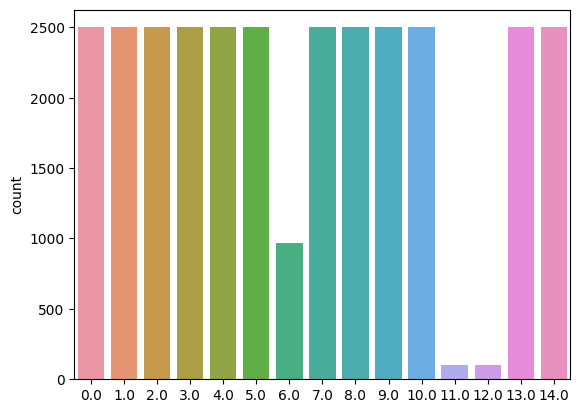

In [ ]:
sus.countplot(x = labelcropped)

In [ ]:
labelcropped.shape

(31168,)

In [ ]:
from keras.utils.np_utils import to_categorical
yOHE = tf.keras.utils.to_categorical(labelcropped,15)

In [ ]:
for x in cat_label :

  arr[ x ] += 1

In [ ]:
arr

[119304,
 91588,
 418102,
 447112,
 283248,
 10862,
 1934,
 63478,
 18836,
 16602,
 5340,
 206,
 196,
 1044558,
 1644994]

In [ ]:
yOHE.shape

(31168, 15)

In [ ]:
ohe_data = pd.get_dummies(
    labelcropped
)

In [ ]:
ohe_data

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
31164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
31165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
31166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
import numpy as np

In [ ]:
ohe_np = np.array(ohe_data)

In [ ]:
type(ohe_np)

numpy.ndarray

In [ ]:
ohe_np

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [ ]:
del np_y
del np_x

In [ ]:
gc.collect()

204

In [ ]:
np_x = np.array(df['TEXT'])
np_y = np.array( ohe_data )

(raylet) [2023-05-20 13:07:51,701 E 3218 3218] (raylet) node_manager.cc:3071: 1 Workers (tasks / actors) killed due to memory pressure (OOM), 0 Workers crashed due to other reasons at node (ID: 8a33baf4afb28bd6789b0a4a00a1875063d124a20bb41ae65af5f3e7, IP: 172.28.0.12) over the last time period. To see more information about the Workers killed on this node, use `ray logs raylet.out -ip 172.28.0.12`
(raylet) 
(raylet) Refer to the documentation on how to address the out of memory issue: https://docs.ray.io/en/latest/ray-core/scheduling/ray-oom-prevention.html. Consider provisioning more memory on this node or reducing task parallelism by requesting more CPUs per task. To adjust the kill threshold, set the environment variable `RAY_memory_usage_threshold` when starting Ray. To disable worker killing, set the environment variable `RAY_memory_monitor_refresh_ms` to zero.
2023-05-20 13:08:03,696	WARNING worker.py:1986 -- A worker died or was killed while executing a task by an unexpected sys

In [ ]:
#np_y

In [ ]:
Textcropped.shape

(31168,)

In [ ]:
ohe_data.shape

(31168, 15)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Textcropped, ohe_data,test_size=0.30)

In [ ]:
export_df = ogpd.DataFrame( columns = [Textcropped, ohe_data]  )

In [ ]:
exp_df = ogpd.DataFrame()

In [ ]:
exp_df["TEXT"] = Textcropped

In [ ]:
exp_df

,TEXT
0,Admission Date: [**2151-7-16**] Dischar...
1,Admission Date: [**2118-6-2**] Discharg...
2,Admission Date: [**2119-5-4**] D...
3,Admission Date: [**2124-7-21**] ...
4,Admission Date: [**2162-3-3**] D...
...,...
31163,Addendum - K 3.4. Phos 1.8 - pt being repleted...
31164,the pt remains stable on cmv 700x18x50%x21.bs:...
31165,repeat hct 38.7...dr [**Last Name (STitle) 378...
31166,Respiratory Care:\nPatient remains on ventilat...


In [ ]:
new_df = ogpd.concat( [exp_df, ogpd.DataFrame(np_y)], axis = 1 )

In [ ]:
new_df

,TEXT,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Admission Date: [**2151-7-16**] Dischar...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Admission Date: [**2118-6-2**] Discharg...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Admission Date: [**2119-5-4**] D...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Admission Date: [**2124-7-21**] ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Admission Date: [**2162-3-3**] D...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31163,Addendum - K 3.4. Phos 1.8 - pt being repleted...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
31164,the pt remains stable on cmv 700x18x50%x21.bs:...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
31165,repeat hct 38.7...dr [**Last Name (STitle) 378...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
31166,Respiratory Care:\nPatient remains on ventilat...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
new_df.to_csv( "/content/gdrive/MyDrive/MIMIC_weights/data.csv" )

In [ ]:
import pandas as pd

In [ ]:
df2 = pd.read_csv( "/content/gdrive/MyDrive/MIMIC_weights/data.csv" )

In [ ]:
df2

,Unnamed: 0,TEXT,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,Admission Date: [**2151-7-16**] Dischar...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,Admission Date: [**2118-6-2**] Discharg...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Admission Date: [**2119-5-4**] D...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,Admission Date: [**2124-7-21**] ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,Admission Date: [**2162-3-3**] D...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31163,31163,Addendum - K 3.4. Phos 1.8 - pt being repleted...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
31164,31164,the pt remains stable on cmv 700x18x50%x21.bs:...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
31165,31165,repeat hct 38.7...dr [**Last Name (STitle) 378...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
31166,31166,Respiratory Care:\nPatient remains on ventilat...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
exp_df.rename(
    columns = {

    }
)

In [ ]:
y_test.shape

(9351, 15)

In [ ]:
y_train.shape

(21817, 15)

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

In [ ]:
from keras.regularizers import l2
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [ ]:
import tensorflow as tf

#l = tf.keras.layers.Dense(512, activation='relu', name='dense-1', kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.01))(outputs["pooled_output"])
#l = tf.keras.layers.Dense(512, activation='relu', name='dense-1', kernel_regularizer=tf.keras.regularizers.L1(l1=0.1))(outputs["pooled_output"])
l = tf.keras.layers.Dense(512, activation='relu', name='dense-1', kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))(outputs["pooled_output"])
l = tf.keras.layers.Dropout(0.20, name="drop-1")(l)
l = tf.keras.layers.Dense(512, activation='relu', name='dense-2')(l)
l = tf.keras.layers.Dropout(0.2, name = "drop-2")(l)
l = tf.keras.layers.Dense(15, activation='softmax', name="output")(l)

In [ ]:
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.losses.MeanSquaredError(
           name = 'mean_squared_error'
      )
]

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', #loss = 'mean_squared_error',# tf.keras.losses.MeanSquaredError(),
    metrics=METRICS
  )

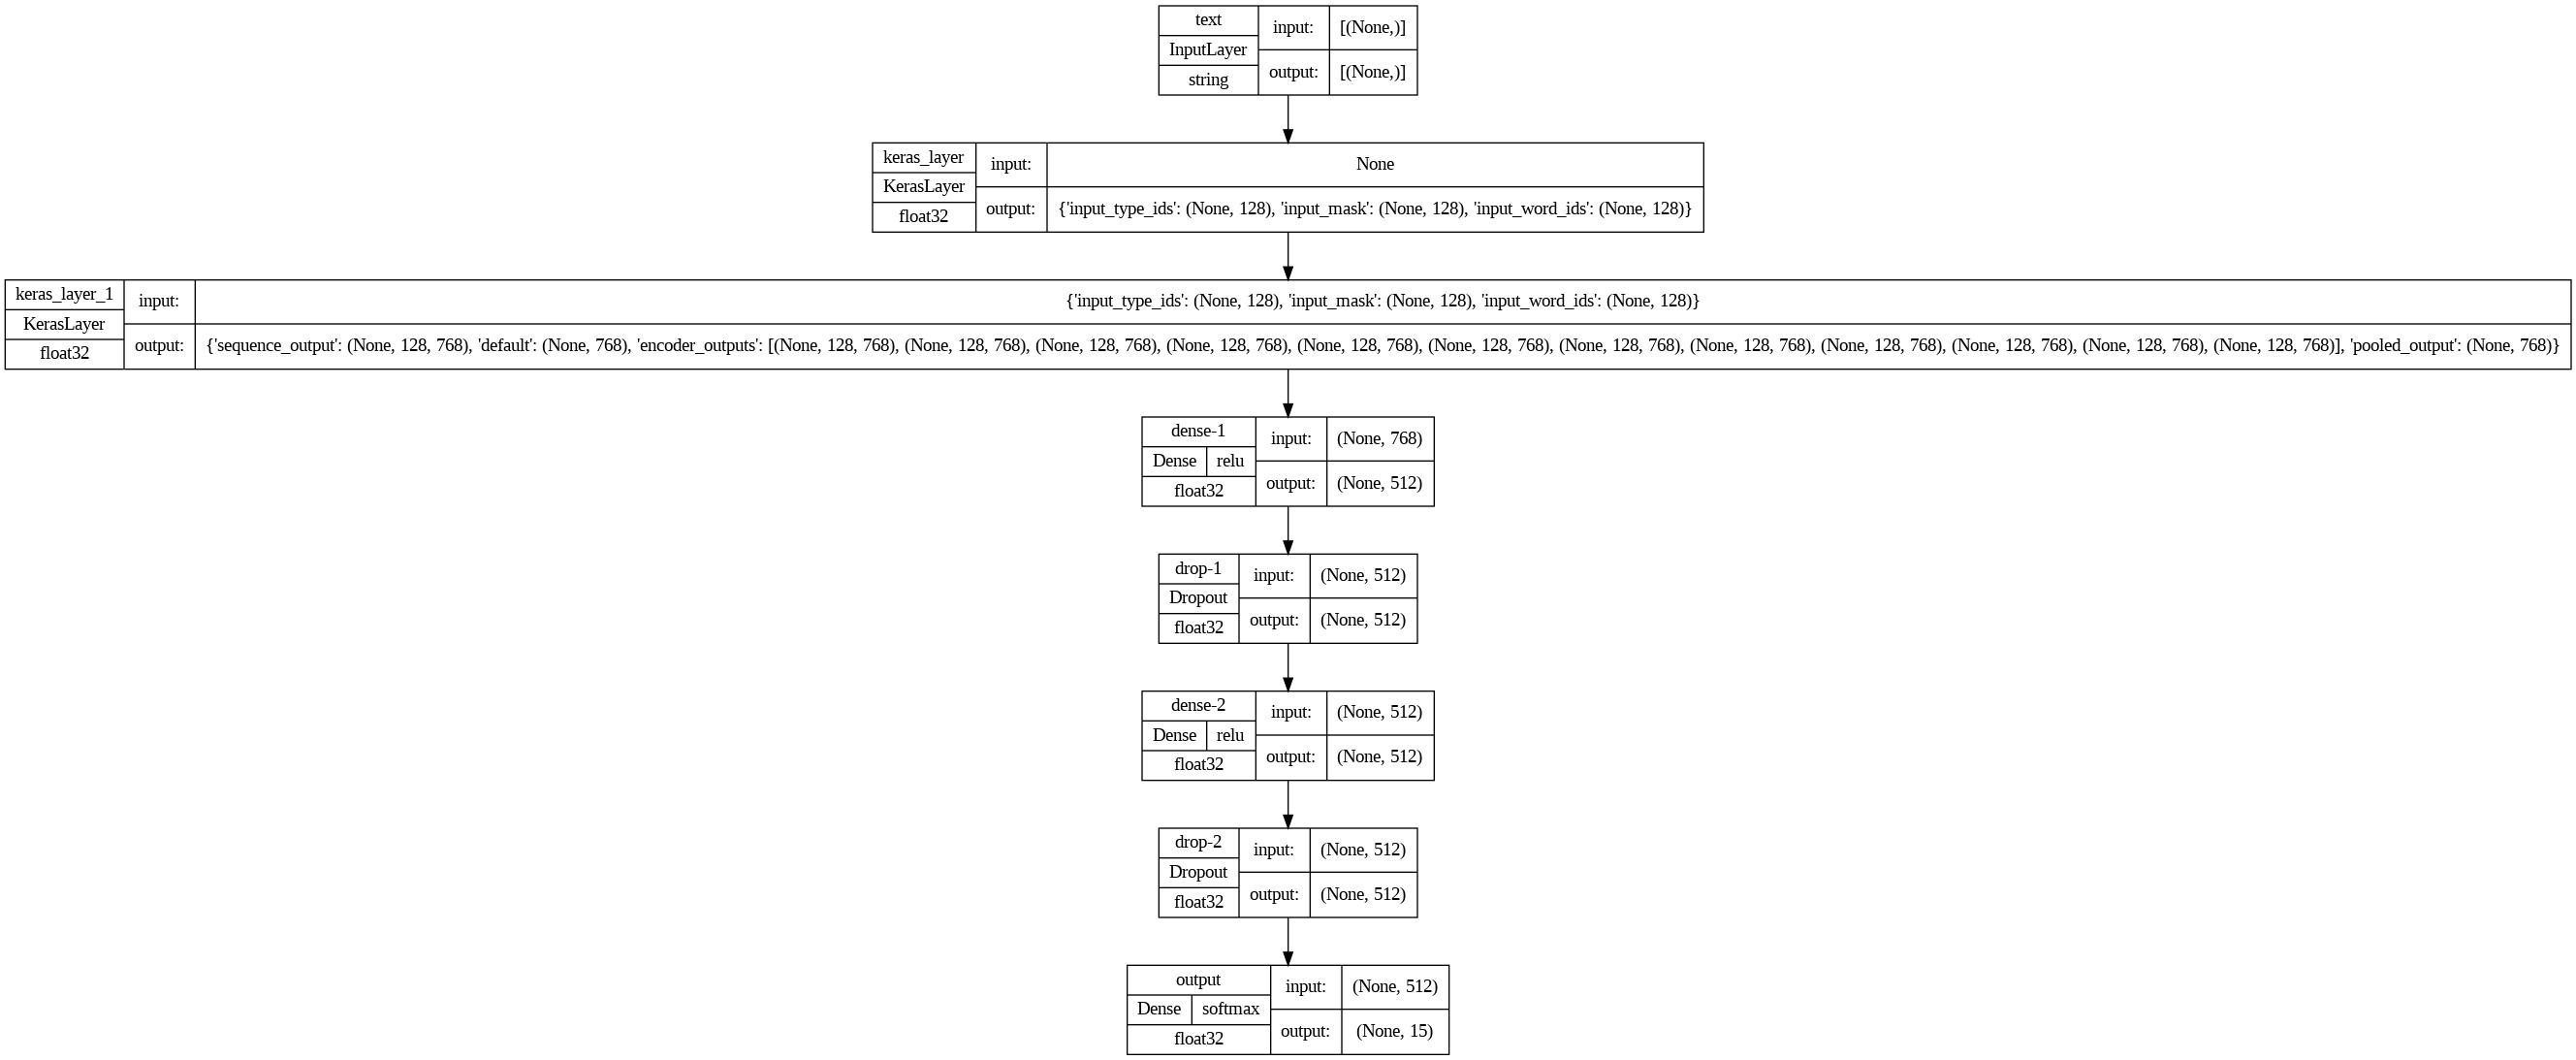

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes = True,
    show_dtype = True,
    show_layer_activations = True
)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [ ]:
y_train.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( df2["TEXT"], df2.drop( columns = ["TEXT"] ), test_size = 0.3)

In [ ]:
history = model1.fit(
    tf.convert_to_tensor(X_train) ,
    tf.convert_to_tensor(y_train) ,
    epochs=10,
    validation_split=0.3 #,
    #validation_data = (X_val, y_val)
)

Epoch 1/10
478/478 [==============================] - 349s 717ms/step - loss: 0.9808 - accuracy: 0.7016 - precision: 0.8456 - recall: 0.5986 - mean_squared_error: 0.0247 - val_loss: 0.7329 - val_accuracy: 0.8168 - val_precision: 0.9285 - val_recall: 0.7123 - val_mean_squared_error: 0.0174
Epoch 2/10
366/478 [=====================>........] - ETA: 45s - loss: 1.0713 - accuracy: 0.6916 - precision: 0.8443 - recall: 0.5709 - mean_squared_error: 0.0273

KeyboardInterrupt: ignored

In [ ]:
model.save_weights( "/content/gdrive/MyDrive/MIMIC_weights/19052023/weights.h5" )

In [ ]:
model1 = model

In [ ]:
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy', #loss = 'mean_squared_error',# tf.keras.losses.MeanSquaredError(),
    metrics=METRICS
)

In [ ]:
model1.load_weights( "/content/gdrive/MyDrive/MIMIC_weights/19052023/weights.h5" )

In [ ]:
yhat = model1.predict( X_test )

293/293 [==============================] - 120s 401ms/step


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=09441a82204d6a8f372e7be615f2aa0205fc2f8febdd61a55876c7102fdc18f6
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(
    np.argmax( np.array(y_test) , axis=1 ),
    np.argmax( np.array(yhat), axis=1 )
)

0.7576729761522831

In [ ]:
y_test.shape

(9351, 15)

In [ ]:
yhat.shape

(9351, 15)

In [ ]:
type(history.history)

dict

In [ ]:
import json

with open( "/content/gdrive/MyDrive/MIMIC_weights/19052023/TST.json", 'w' ) as jsonfile :

  jsn = json.dumps( history.history, indent = 4 )
  jsonfile.write( jsn )

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'mean_squared_error', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_mean_squared_error'])

In [ ]:
X_train.shape

(21817,)

In [ ]:
history = {}

In [ ]:
import json


history = json.load( open("/content/gdrive/MyDrive/MIMIC_weights/19052023/TST.json", "r") )

In [ ]:
history

{'loss': [2.413938283920288,
  1.3101613521575928,
  1.221872329711914,
  1.1381537914276123,
  1.1407721042633057,
  1.103739619255066,
  1.1111626625061035,
  1.0973941087722778,
  1.0718134641647339,
  1.029241919517517],
 'accuracy': [0.5325781106948853,
  0.6643965840339661,
  0.6795887351036072,
  0.6992338299751282,
  0.6858751773834229,
  0.6996267437934875,
  0.6873813271522522,
  0.6957632303237915,
  0.7016567587852478,
  0.7104970216751099],
 'precision': [0.8390227556228638,
  0.8478971719741821,
  0.8476396799087524,
  0.8531001210212708,
  0.8541014790534973,
  0.8580069541931152,
  0.8525647521018982,
  0.8551388382911682,
  0.8497661352157593,
  0.8538829684257507],
 'recall': [0.3283347487449646,
  0.5095933675765991,
  0.5373584032058716,
  0.5685285925865173,
  0.5543186664581299,
  0.5666295886039734,
  0.5627005696296692,
  0.574815034866333,
  0.5830004811286926,
  0.5954423546791077],
 'mean_squared_error': [0.03892453387379646,
  0.02968158945441246,
  0.028414

In [ ]:
result1000= [

    history['accuracy'],
    history['val_accuracy'],
    history['loss'],
    history['val_loss']
]

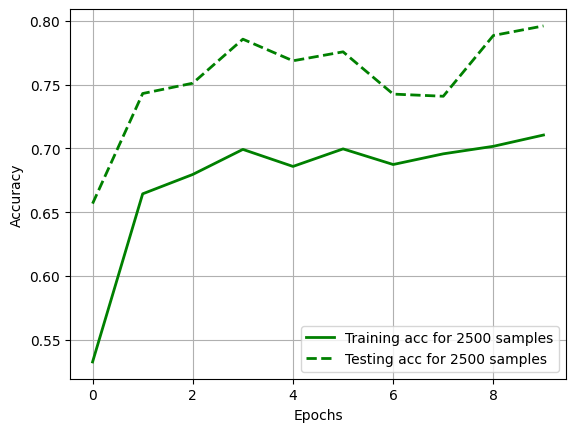

In [ ]:
import keras
from matplotlib import pyplot as plt

plt.plot(result1000[0],'g',linewidth=2)
plt.plot(result1000[1],'g--',linewidth=2)
plt.grid(True)
# plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training acc for 2500 samples','Testing acc for 2500 samples'], loc='best')
plt.savefig("acc for 10 epochs",dpi=300)
plt.show()

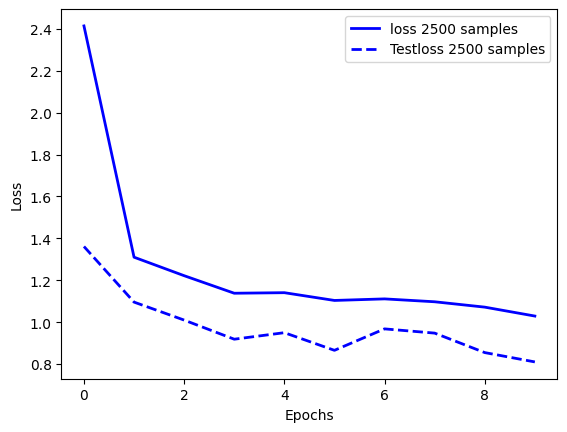

In [ ]:
import keras
from matplotlib import pyplot as plt

plt.plot(result1000[2],'b',linewidth=2)
plt.plot(result1000[3],'b--',linewidth=2)
# plt.title('model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['loss 2500 samples','Testloss 2500 samples'], loc='best')
#plt.legend(['loss 350 samples','loss 1000 samples','loss 2000 samples'], loc='best')
plt.savefig("loss for 10 epochs",dpi=300)
plt.show()

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [ ]:
model1.layers

In [ ]:
model_feat = Model(inputs=model1.input,outputs=model1.get_layer("dense-2").output)

In [ ]:
model_feat

In [ ]:
feat_train = model_feat.predict(x_train)
feat_test = model_feat.predict(x_test)
print(feat_train.shape)

  2/682 [..............................] - ETA: 2:46:02

KeyboardInterrupt: ignored

In [ ]:
feat_test.shape

(9351, 512)

In [ ]:
y_train.shape

(21817, 15)

In [ ]:
y_test.shape

(9351, 15)

In [ ]:
from sklearn.svm import SVC

In [ ]:
import time

In [ ]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
y_train.shape

(21817, 15)

In [ ]:
y_train.head()

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
20475,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1194,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28552,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
28471,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
744,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_nohot_tr = np.argmax(
    np.array(y_train),
    axis = 1
)

## SVC linear

In [ ]:
start_time=time.time()
clf = SVC(kernel='linear', C=100, random_state=42)
clf.fit(feat_train, y_nohot_tr)


SVC(C=100, kernel='linear', random_state=42)

In [ ]:
y_pred = clf.predict(feat_test)
y_predtr = clf.predict(feat_train)

NameError: ignored

In [ ]:
y_test_norm = np.argmax( np.array(y_test) )
y_trainnorm = np.argmax( np.array(y_train) )

In [ ]:
acc1 = accuracy_score(np.argmax(np.array(y_test), axis=1), y_pred)
end_time=time.time()
print(f"Execution time: {end_time - start_time:.5f} seconds")
findMetrics( "Linear SVM test", y_testnorm, y_predtr )

NameError: ignored

In [ ]:
acc2 = accuracy_score(np.argmax(np.array(y_train), axis=1), y_predtr)
end_time=time.time()
print(f"Execution time: {end_time - start_time:.5f} seconds")
print("Train Accuracy:", acc2*100)

Execution time: 109.26207 seconds
Train Accuracy: 86.56552229912452


## SVC rbf

In [ ]:
start_time=time.time()
clf = SVC(kernel='rbf', C=100, random_state=42)
clf.fit(feat_train, np.argmax(np.array(y_train), axis=1))

SVC(C=100, random_state=42)

In [ ]:
y_pred = clf.predict(feat_test)
y_predtr = clf.predict(feat_train)
acc1 = accuracy_score(np.argmax(y_test, axis=1), y_pred )
end_time=time.time()
print(f"Execution time: {end_time - start_time:.5f} seconds")
print("Test Accuracy:", acc1*100)
acc2 = accuracy_score(np.argmax(y_train, axis=1), y_predtr)
end_time=time.time()
print(f"Execution time: {end_time - start_time:.5f} seconds")
print("Test Accuracy:", acc2*100)

In [ ]:
start_time=time.time()
clf = SVC(kernel='sigmoid', C=100, random_state=42)
clf.fit(feat_train, np.argmax(y_train, axis=1))
y_pred = clf.predict(feat_test)
y_predtr = clf.predict(feat_train)
acc1 = accuracy_score(np.argmax(y_test, axis=1), y_pred)
end_time=time.time()
print(f"Execution time: {end_time - start_time:.5f} seconds")
print("Test Accuracy:", acc1*100)
acc2 = accuracy_score(np.argmax(y_train, axis=1), y_predtr)
end_time=time.time()
print(f"Execution time: {end_time - start_time:.5f} seconds")
print("Train Accuracy:", acc2*100)

In [ ]:
start_time=time.time()
clf = SVC(kernel='precomputed', C=10, random_state=42)
clf.fit(feat_train, np.argmax(y_train, axis=1))
y_pred = clf.predict(feat_test)
y_predtr = clf.predict(feat_train)
acc1 = accuracy_score(np.argmax(y_test, axis=1), y_pred)
end_time=time.time()
print(f"Execution time: {end_time - start_time:.5f} seconds")
print("Test Accuracy:", acc1*100)
acc2 = accuracy_score(np.argmax(y_train, axis=1), y_predtr)
end_time=time.time()
print(f"Execution time: {end_time - start_time:.5f} seconds")
print("Test Accuracy:", acc2*100)

In [ ]:
start_time=time.time()
clf = SVC(kernel='precomputed', C=10, random_state=42)
clf.fit(feat_train, np.argmax(y_train, axis=1))
y_pred = clf.predict(feat_test)
y_predtr = clf.predict(feat_train)
acc1 = accuracy_score(np.argmax(y_test, axis=1), y_pred)
end_time=time.time()
print(f"Execution time: {end_time - start_time:.5f} seconds")
print("Test Accuracy:", acc1*100)
acc2 = accuracy_score(np.argmax(y_train, axis=1), y_predtr)
end_time=time.time()
print(f"Execution time: {end_time - start_time:.5f} seconds")
print("Test Accuracy:", acc2*100)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
def findMetrics( name, ytrue, ypred ) :

  print( f"Data\t{name}" )
  print( "-"*20 )
  print( f"Accu\t{accuracy_score( ytrue, ypred )}" )
  print( f"Prec\t{precision_score( ytrue, ypred )}" )
  print( f"Reca\t{recall_score( ytrue, ypred )}" )
  print( f"f1\t{f1_score( ytrue, ypred )}" )
  print( f"auc\t{auc_score( ytrue, ypred )}" )